In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [2]:
from google.colab import files
dataset = files.upload()

Saving BTC-USD.csv to BTC-USD.csv


In [5]:
df= pd.read_csv('BTC-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-17,31397.308594,31935.945313,31223.990234,31533.068359,31533.068359,1.889502e+10
1,2021-07-18,31533.884766,32398.996094,31215.492188,31796.810547,31796.810547,1.878799e+10
2,2021-07-19,31800.011719,31885.859375,30563.734375,30817.832031,30817.832031,2.043479e+10
3,2021-07-20,30838.285156,31006.187500,29360.955078,29807.347656,29807.347656,2.314827e+10
4,2021-07-21,29796.285156,32752.326172,29526.183594,32110.693359,32110.693359,2.820302e+10
...,...,...,...,...,...,...,...
361,2022-07-13,19325.972656,20223.052734,18999.953125,20212.074219,20212.074219,3.304243e+10
362,2022-07-14,20211.466797,20789.894531,19689.257813,20569.919922,20569.919922,3.115874e+10
363,2022-07-15,20573.156250,21138.244141,20397.000000,20836.328125,20836.328125,2.590558e+10
364,2022-07-16,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(366, 7)

In [7]:
df = df['Open'].values
df = df.reshape(-1, 1)

In [8]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [10]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [11]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
8/8 [==============================] - 16s 154ms/step - loss: 0.0829
Epoch 2/50
8/8 [==============================] - 1s 150ms/step - loss: 0.0323
Epoch 3/50
8/8 [==============================] - 1s 148ms/step - loss: 0.0253
Epoch 4/50
8/8 [==============================] - 2s 197ms/step - loss: 0.0238
Epoch 5/50
8/8 [==============================] - 2s 262ms/step - loss: 0.0190
Epoch 6/50
8/8 [==============================] - 3s 347ms/step - loss: 0.0199
Epoch 7/50
8/8 [==============================] - 1s 172ms/step - loss: 0.0161
Epoch 8/50
8/8 [==============================] - 1s 148ms/step - loss: 0.0173
Epoch 9/50
8/8 [==============================] - 1s 149ms/step - loss: 0.0162
Epoch 10/50
8/8 [==============================] - 1s 149ms/step - loss: 0.0175
Epoch 11/50
8/8 [==============================] - 1s 159ms/step - loss: 0.0154
Epoch 12/50
8/8 [==============================] - 1s 163ms/step - loss: 0.0173
Epoch 13/50
8/8 [==============================]

In [17]:
model = load_model('stock_prediction.h5')

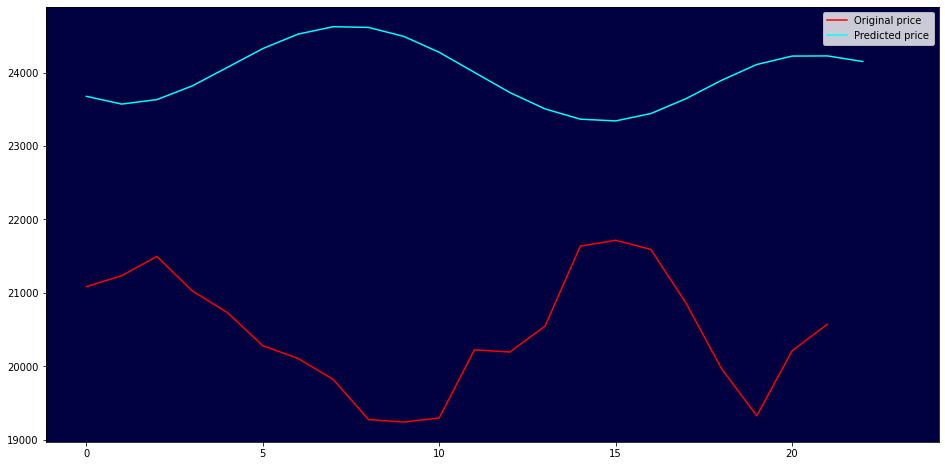

In [18]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()